In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy import stats


In [2]:

def create_noise_examples(size=(256, 256)):
    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Different Types of Noise Distributions', fontsize=16)

    # 1. Gaussian Noise
    gaussian_noise = np.random.normal(0, 1, size)
    axes[0, 0].imshow(gaussian_noise, cmap='gray')
    axes[0, 0].set_title('Gaussian Noise')

    # 2. Rayleigh Noise
    a = 0
    b = 2
    rayleigh_noise = np.random.rayleigh(scale=b, size=size)
    axes[0, 1].imshow(rayleigh_noise, cmap='gray')
    axes[0, 1].set_title('Rayleigh Noise')

    # 3. Gamma Noise
    shape = 2.0  # a parameter
    scale = 2.0  # b parameter
    gamma_noise = np.random.gamma(shape, scale, size)
    axes[0, 2].imshow(gamma_noise, cmap='gray')
    axes[0, 2].set_title('Gamma Noise')

    # 4. Exponential Noise
    exponential_noise = np.random.exponential(scale=1.0, size=size)
    axes[1, 0].imshow(exponential_noise, cmap='gray')
    axes[1, 0].set_title('Exponential Noise')

    # 5. Uniform Noise
    uniform_noise = np.random.uniform(0, 1, size)
    axes[1, 1].imshow(uniform_noise, cmap='gray')
    axes[1, 1].set_title('Uniform Noise')

    # 6. Impulse (Salt & Pepper) Noise
    impulse_noise = np.random.choice([0, 1], size=size, p=[0.5, 0.5])
    axes[1, 2].imshow(impulse_noise, cmap='gray')
    axes[1, 2].set_title('Impulse Noise')

    # Remove axis ticks
    for ax in axes.flat:
        ax.axis('off')

    plt.tight_layout()
    return fig

def plot_pdfs():
    z = np.linspace(-4, 8, 1000)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Probability Density Functions of Different Noise Types', fontsize=16)

    # 1. Gaussian PDF
    gaussian_pdf = stats.norm.pdf(z, loc=0, scale=1)
    axes[0, 0].plot(z, gaussian_pdf, 'r-')
    axes[0, 0].set_title('Gaussian Distribution')
    axes[0, 0].grid(True)

    # 2. Rayleigh PDF
    rayleigh_pdf = stats.rayleigh.pdf(z[z>=0], scale=1)
    axes[0, 1].plot(z[z>=0], rayleigh_pdf, 'r-')
    axes[0, 1].set_title('Rayleigh Distribution')
    axes[0, 1].grid(True)

    # 3. Gamma PDF
    gamma_pdf = stats.gamma.pdf(z[z>=0], a=2, scale=2)
    axes[0, 2].plot(z[z>=0], gamma_pdf, 'r-')
    axes[0, 2].set_title('Gamma Distribution')
    axes[0, 2].grid(True)

    # 4. Exponential PDF
    exp_pdf = stats.expon.pdf(z[z>=0], scale=1)
    axes[1, 0].plot(z[z>=0], exp_pdf, 'r-')
    axes[1, 0].set_title('Exponential Distribution')
    axes[1, 0].grid(True)

    # 5. Uniform PDF
    uniform_x = np.linspace(0, 1, 100)
    uniform_pdf = np.ones_like(uniform_x)
    axes[1, 1].plot(uniform_x, uniform_pdf, 'r-')
    axes[1, 1].set_title('Uniform Distribution')
    axes[1, 1].grid(True)

    # 6. Impulse PDF
    impulse_x = np.array([0, 0, 1, 1])
    impulse_y = np.array([0, 0.5, 0.5, 0])
    axes[1, 2].plot(impulse_x, impulse_y, 'r-')
    axes[1, 2].set_title('Impulse Distribution')
    axes[1, 2].grid(True)

    plt.tight_layout()
    return fig



In [3]:
# Generate and display both visualizations
noise_fig = create_noise_examples()
pdf_fig = plot_pdfs()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [4]:
def create_pattern(size=256):
    # Create base image with three intensity levels
    pattern = np.ones((size, size)) * 0.5  # Medium gray background
    center = size // 2
    radius_outer = size // 3
    radius_inner = size // 4

    y, x = np.ogrid[-center:size-center, -center:size-center]
    mask_outer = x*x + y*y <= radius_outer*radius_outer
    pattern[mask_outer] = 0.75  # Light gray outer circle

    mask_inner = x*x + y*y <= radius_inner*radius_inner
    pattern[mask_inner] = 1.0  # White inner circle

    return pattern

def add_noise(image, noise_type, params=None):
    noisy = image.copy()
    if noise_type == 'gaussian':
        noise = np.random.normal(0, params['sigma'], image.shape)
        noisy = image + noise
    elif noise_type == 'rayleigh':
        noise = np.random.rayleigh(params['scale'], image.shape)
        noisy = image + (noise - np.mean(noise))
    elif noise_type == 'gamma':
        noise = np.random.gamma(params['shape'], params['scale'], image.shape)
        noisy = image + (noise - np.mean(noise))
    elif noise_type == 'exponential':
        noise = np.random.exponential(params['scale'], image.shape)
        noisy = image + (noise - np.mean(noise))
    elif noise_type == 'uniform':
        noise = np.random.uniform(-params['amplitude'], params['amplitude'], image.shape)
        noisy = image + noise
    elif noise_type == 'salt_and_pepper':
        mask = np.random.random(image.shape) < params['prob']
        noisy[mask] = 1.0  # Salt
        mask = np.random.random(image.shape) < params['prob']
        noisy[mask] = 0.0  # Pepper

    return np.clip(noisy, 0, 1)

# Create the visualization
def create_noise_analysis():
    # Set up the figure
    fig = plt.figure(figsize=(20, 15))

    # Create original pattern
    pattern = create_pattern()

    # Define noise parameters
    noise_types = {
        'gaussian': {'sigma': 0.1},
        'rayleigh': {'scale': 0.1},
        'gamma': {'shape': 2, 'scale': 0.1},
        'exponential': {'scale': 0.1},
        'uniform': {'amplitude': 0.2},
        'salt_and_pepper': {'prob': 0.05}
    }

    # Plot original image and its histogram
    plt.subplot(7, 3, 1)
    plt.imshow(pattern, cmap='gray')
    plt.title('Original Pattern')
    plt.axis('off')

    plt.subplot(7, 3, 2)
    plt.hist(pattern.ravel(), bins=50, density=True, color='blue', alpha=0.7)
    plt.title('Original Histogram')
    plt.grid(True)

    plt.subplot(7, 3, 3)
    plt.axis('off')

    # Plot each noise type
    for idx, (noise_type, params) in enumerate(noise_types.items(), 1):
        noisy_img = add_noise(pattern, noise_type, params)

        # Plot noisy image
        plt.subplot(7, 3, (idx+1)*3-2)
        plt.imshow(noisy_img, cmap='gray')
        plt.title(f'{noise_type.replace("_", " ").title()} Noise')
        plt.axis('off')

        # Plot histogram
        plt.subplot(7, 3, (idx+1)*3-1)
        plt.hist(noisy_img.ravel(), bins=50, density=True, color='blue', alpha=0.7)

        # Overlay theoretical PDF where applicable
        x = np.linspace(0, 1, 100)
        if noise_type == 'gaussian':
            pdf = stats.norm.pdf(x, loc=np.mean(noisy_img), scale=params['sigma'])
            plt.plot(x, pdf, 'r-', lw=2, label='Theoretical PDF')
        elif noise_type == 'rayleigh':
            pdf = stats.rayleigh.pdf(x, loc=0, scale=params['scale'])
            plt.plot(x, pdf, 'r-', lw=2, label='Theoretical PDF')

        plt.title(f'{noise_type.replace("_", " ").title()} Histogram')
        plt.grid(True)

        # Empty subplot for spacing
        plt.subplot(7, 3, (idx+1)*3)
        plt.axis('off')

    plt.tight_layout()
    return fig



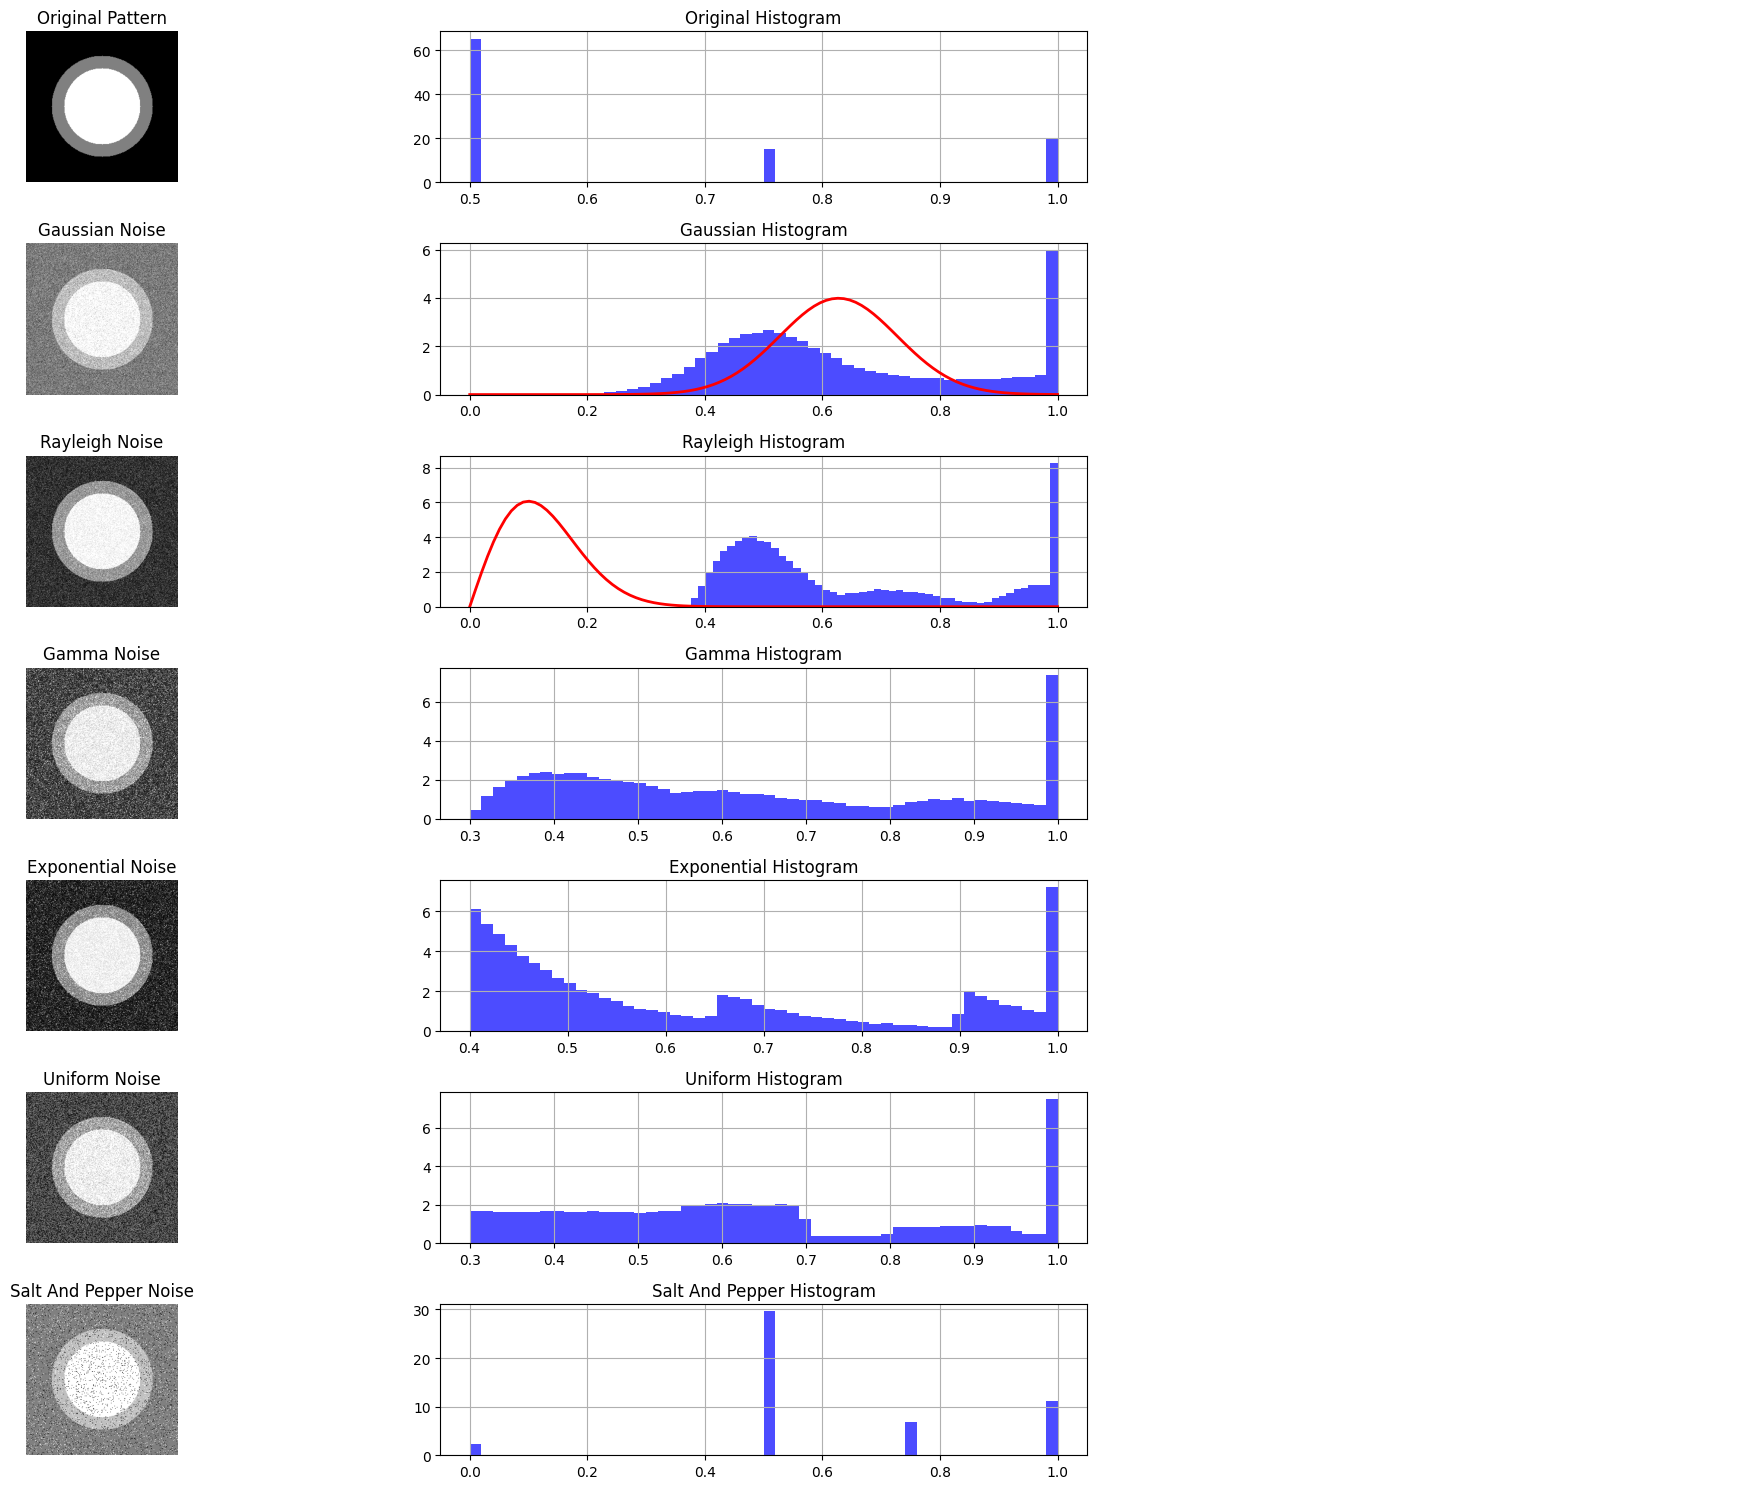

In [5]:
# Generate and display the visualization
fig = create_noise_analysis()
plt.show()